# REGRESION LINEAL


In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parametros
#------------
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Datos de entrenamiento
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# entradas del grafo
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Definir pesos del modelo
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# construccion del modelo lineal
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Calculo de error cuadratico medio
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradiente desendente
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# inicializar las variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.098631799 W= 0.167672 b= 1.39081
Epoch: 0100 cost= 0.096140981 W= 0.172544 b= 1.35575
Epoch: 0150 cost= 0.093937233 W= 0.177127 b= 1.32279
Epoch: 0200 cost= 0.091987327 W= 0.181437 b= 1.29178
Epoch: 0250 cost= 0.090262175 W= 0.185491 b= 1.26262
Epoch: 0300 cost= 0.088735707 W= 0.189304 b= 1.23519
Epoch: 0350 cost= 0.087385148 W= 0.19289 b= 1.20939
Epoch: 0400 cost= 0.086190403 W= 0.196262 b= 1.18513
Epoch: 0450 cost= 0.085133247 W= 0.199433 b= 1.16232
Epoch: 0500 cost= 0.084197789 W= 0.202416 b= 1.14086
Epoch: 0550 cost= 0.083369978 W= 0.205222 b= 1.12067
Epoch: 0600 cost= 0.082637578 W= 0.20786 b= 1.10169
Epoch: 0650 cost= 0.081989393 W= 0.210342 b= 1.08384
Epoch: 0700 cost= 0.081415765 W= 0.212677 b= 1.06704
Epoch: 0750 cost= 0.080908179 W= 0.214872 b= 1.05125
Epoch: 0800 cost= 0.080458991 W= 0.216937 b= 1.0364
Epoch: 0850 cost= 0.080061458 W= 0.218879 b= 1.02242
Epoch: 0900 cost= 0.079709589 W= 0.220706 b= 1.00928
Epoch: 0950 cost= 0.079398200 W= 0.222424 b= 0.99

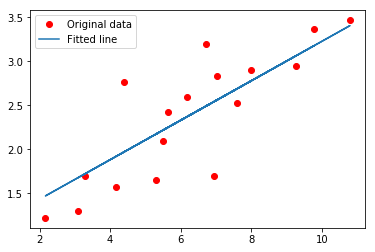

In [8]:
# Comenzar entrenamiento
with tf.Session() as sess:
    sess.run(init)

    # Ajustar los datos
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Mostrar registros por iteracion
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimizacion lista!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
# Regression result